In [2]:
!pip install tweepy
!pip install textblob
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.4 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import requests 
from requests.structures import CaseInsensitiveDict
import json
import configparser 
import tweepy
from textblob import TextBlob
import re 
import demoji

In [2]:
DATASET_COLUMNS=['target','ids','date','query','user','text']
DATASET_ENCODING = "ISO-8859-1"
data=pd.read_csv('Data/trainingTwitter.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS)

In [3]:
data.head(5)

,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
data['target']=data['target'].replace(4,1)

In [9]:
data['target'].dtype

dtype('int64')

n    800000
p    800000
Name: target, dtype: int64


<AxesSubplot:>

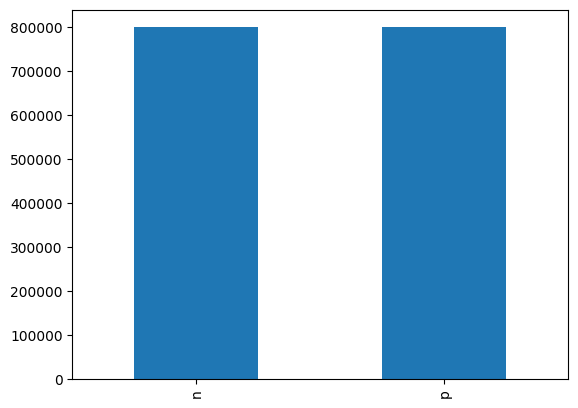

In [10]:
sentimentDictionary={0:'n',1:'p'}
print(data.target.apply(lambda x: sentimentDictionary[x]).value_counts())
data.target.apply(lambda x: sentimentDictionary[x]).value_counts().plot(kind='bar')

In [11]:
data=data[['text','target']]

In [12]:
data.head(5)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [14]:
data_pos=data[data['target']==1].sample(n=50000,random_state=42)
data_neg=data[data['target']==0].sample(n=50000,random_state=42)

In [16]:
finalDataset=pd.concat([data_pos,data_neg])
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1012188 to 491974
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    100000 non-null  object
 1   target  100000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [17]:
# Language detection


In [18]:
import re
import unicodedata
# Removing the noise 
import re 
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# WebApp Library
import requests 
from requests.structures import CaseInsensitiveDict
import json
import configparser 
import tweepy

# Math functions library
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd
import inflect

# Grammar Library 
from transformers import BertModel, BertTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
import string
import gensim.models 
import nltk
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import re 
import demoji
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from spacy.util import minibatch, compounding
from spacy.pipeline import nlp




In [ ]:


stop_words=set(stopwords.words("english"))

class unsupervisedModel(object):
    def __init__(self):

        # Functionality to adjust grammar 
        self.p=inflect.engine()
        self.lemmatizer=WordNetLemmatizer()
        self.stopWords=set(stopwords.words('english'))
        self.bertTokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
        self.bertModel=BertModel.from_pretrained('bert-base-uncased')


    '''PART 1: Anything below this line is for the encoding process of the model'''
    # ----------------------------------------------------------------
    '''Dictionary mapping function for subtext in unicode  reducing run time '''
    def BTU(self):
        # Create a mapping between ASCII and UNICODE 
        bs=list(range(ord("!"),ord("~")))+list(range(ord("i"),ord("¬")+1))+list(range(ord("®"),ord("ÿ")+1))
        cs=bs[:]
        n=0
        for b in range(2**8):
            if b not in bs:
                bs.append(b)
                cs.append(2**8+n)
                n+=1

        cs=[chr(n) for n in cs]
        return dict(zip(bs,cs))
    
    
    # Normalize text
    def normaliseUnicode(text):
        text = unicodedata.normalize('NFKD',text)
        text=text.lower()
        text=re.sub(r'\s+',' ', text).strip()
        return text

    def clean_text(text):
        try:
            text=BeautifulSoup(text,"html.parser").get_text()
        except:
            print("No HTML tags found")
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
        text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
        text = re.sub(r'\s+', ' ', text, flags=re.I)
        text = re.sub(r'^b\s+', '', text)
        text = text.lower()
        tokens = word_tokenize(text)
        
        # Filter out stop words
        text = ' '.join(token for token in tokens if token not in stop_words)

        
        return text
    

    def tokenize(text):
        # # Initialize tokenizer
        # tokens=word_tokenize(text)
        # # convert tokens to lower case and remove punctuations 
        # tokens=[w.lower() for w in tokens]
        # tokens=[word for word in tokens if word.isalpha()]

        # # remove stop words 
        # tokens=[word for word in tokens if not word in self.stopWords]

        # # Lemmatization
        # tokens=[self.lemmatizer.lemmatize(word,pos='v') for word in tokens]
        # tokens=[self.lemmatizer.lemmatize(word,pos='n') for word in tokens]

        nlp=spacy.load('en_core_web_sm')


        
        

    

In [ ]:
from symspellby import SymSpell,Verbosity

# Change these later to see how the model can be tested
max_edit_distance_dictionary=2
prefix_length=5

# Initialize the instance 
sym_spell=SymSpell(max_edit_distance_dictionary,prefix_length)

# Load dictionary for the model
dictionary_path=sym_spell.pd_dictionary_path
